# <center>Exercise 6 Face Recognition by Classifier</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, make_scorer, f1_score

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [3]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

**Objectives:**
- Use neural network Multilayer Perception and SVM Classifier for this task.
- Utilize RandomizedSearchCV to fine tune the hyperparameters for both Classifiers.
- Apply PCA for dimension reduction.
- Visualize model performance comparison.

**Data Source:** The Professor


## 1 DATA UNDERSTANDING

In [4]:
# Libarary for loading matrix

import scipy.io as scio
data = scio.loadmat("ORL_64x64.mat")
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed Jun 13 16:23:08 2007',
 '__version__': '1.0',
 '__globals__': [],
 'gnd': array([[ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 2],
        [ 2],
        [ 2],
        [ 2],
        [ 2],
        [ 2],
        [ 2],
        [ 2],
        [ 2],
        [ 2],
        [ 3],
        [ 3],
        [ 3],
        [ 3],
        [ 3],
        [ 3],
        [ 3],
        [ 3],
        [ 3],
        [ 3],
        [ 4],
        [ 4],
        [ 4],
        [ 4],
        [ 4],
        [ 4],
        [ 4],
        [ 4],
        [ 4],
        [ 4],
        [ 5],
        [ 5],
        [ 5],
        [ 5],
        [ 5],
        [ 5],
        [ 5],
        [ 5],
        [ 5],
        [ 5],
        [ 6],
        [ 6],
        [ 6],
        [ 6],
        [ 6],
        [ 6],
        [ 6],
        [ 6],
        [ 6],
        [ 6],
        [ 7],
  

Data features and shape

In [5]:
data['fea'].shape

(400, 4096)

>Note:
>- The number of features is greater than the number of samples, and as high as 4096.

In [6]:
data['fea']

array([[ 75,  83,  83, ...,  42,  40,  38],
       [110, 108, 120, ...,  35,  33,  37],
       [ 77,  75,  65, ...,  37,  38,  37],
       ...,
       [121, 119, 113, ...,  41,  45,  46],
       [ 52,  49,  51, ..., 143, 144, 146],
       [125, 125, 125, ...,  96,  91,  93]], dtype=uint8)

Data label and shape

In [7]:
data['gnd'].shape

(400, 1)

In [8]:
data['gnd']

array([[ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 8],
       [ 8],
       [ 8],
       [ 8],
       [ 8],
       [ 8],
       [ 8],

In [34]:
# Count the unique values of y, which are the classes of label
len(np.unique(data['gnd']))

40

>Note:
>- There are 40 classes.

## 2 MODELING AND EVALUATION - BASELINE

- The baseline models are models without manipulating data and hyperparameter tuning.
- Macro F1-score is the objective metric for model perfomance comparison.

In [18]:
# Define X and y values
X = data['fea']
y = data['gnd']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

models = {
    'mlp': MLPClassifier(random_state=8),
    'svm': SVC(random_state=8)       
}

predict=[]
all_macroF1score_baseline = []

for model_name, model in models.items():
    clf = model
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    
    report = classification_report(y_test, predict, output_dict=True)
    macroF1score = round(report['macro avg']['f1-score'], 3)
    all_macroF1score_baseline.append(macroF1score)
    
    print(report)
    print('='*100)
print(f'all_macroF1score_baseline MLP, SVM:  {all_macroF1score_baseline}')

{'1': {'precision': 0.0625, 'recall': 1.0, 'f1-score': 0.11764705882352941, 'support': 5}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4}, '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '6': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3}, '7': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3}, '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3}, '10': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '11': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3}, '12': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '13': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '14': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '15': {'precision': 0.0, 'recall': 0.0, 'f1-score': 

## 3 MODELING AND EVALUATION - WITH HYPERPARAMETER TUNING

### 3.1 Neural Network MLP

In [35]:
mlp = MLPClassifier(early_stopping=True)

# Define the hyperparameters to be tuned
params = {'hidden_layer_sizes': [(100,), (512,), (1024,)],
          'activation': ['logistic', 'tanh', 'relu'],
          'solver': ['lbfgs', 'sgd', 'adam'],          
          'alpha': [0.00001, 0.0001, 0.001],
          'batch_size': [128, 256],
          'max_iter': [100, 200, 300]                      
} 

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(mlp, 
                                   param_distributions=params, 
                                   n_iter=20, 
                                   cv=5, 
                                   scoring=make_scorer(f1_score, average='macro'), 
                                   random_state=32)
random_search.fit(X_train, y_train)

print(f'MLP best parameters: {random_search.best_estimator_}')
print('='*80)

# As the output of MLP model is unstable, runing 100 times to get the best F1-score
all_mlp_F1score = []
for i in range(100):
    best_model = random_search.best_estimator_
    mlp_y_pred = best_model.predict(X_test)
    mlp_F1score = f1_score(y_test, mlp_y_pred, average='macro')
    all_mlp_F1score.append(mlp_F1score)
    
max_mlp_F1score_01 = max(all_mlp_F1score)
print(f"MLP by random_search.best_estimator_ F1-score: {max_mlp_F1score_01}") 

MLP best parameters: MLPClassifier(activation='logistic', alpha=0.001, batch_size=256,
              early_stopping=True, hidden_layer_sizes=(1024,), solver='lbfgs')
MLP by random_search.best_estimator_ F1-score: 0.06547619047619047


### 3.2 SVM

In [38]:
from scipy.stats import uniform

# Build a support vector model
svm = SVC()

# Define the hyperparameters to be tuned
params = {'C': uniform(100, 1000), 
          'kernel': ['inear', 'poly', 'rbf', 'sigmoid'],
          'gamma': uniform(0.001, 1),
          }

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(svm, 
                                   param_distributions=params, 
                                   n_iter=20, 
                                   cv=5,  
                                   scoring=make_scorer(f1_score, average='macro'), 
                                   random_state=32)
random_search.fit(X_train, y_train)

print(f'SVM best parameters: {random_search.best_estimator_}')
print('='*80)

best_model = random_search.best_estimator_
svm_y_pred = best_model.predict(X_test)
svm_F1score_01 = f1_score(y_test, svm_y_pred, average='macro')
print(f"SVM by random_search.best_estimator_ F1-score: {svm_F1score_01}")

SVM best parameters: SVC(C=338.5761263239118, gamma=0.675834529730422, kernel='poly')
SVM by random_search.best_estimator_ F1-score: 0.991919191919192


## 4 MODELING AND EVALUATION - WITH FINE TUNED HYPERPARAMETERS & PCA

### 4.1 MLP

In [53]:
mlp_all_F1score = []
# Loop num of PCA in a range to find out the best
for p in np.linspace(0.8, 1, num=20, endpoint=False):
    print(f'PCA:  {p}')
    # Train a PCA model for training data that contains around p% of important features.
    pca = PCA(n_components=p, whiten=True).fit(X_train)

    # Use the transform function to reduce the dimensions of X_train and X_test data
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Implement the fine tuned hyperparameters from the last section
    mlp = MLPClassifier(activation='logistic', alpha=0.001, batch_size=256,
                  early_stopping=True, hidden_layer_sizes=(1024,), solver='lbfgs')

    mlp.fit(X_train_pca, y_train)
    mlp_predict = mlp.predict(X_test_pca)

    report = classification_report(y_test, mlp_predict, output_dict=True)
    mlp_F1score = round(report['macro avg']['f1-score'], 3)
    mlp_all_F1score.append(mlp_F1score)
    mlp_F1score_02 = round(max(mlp_all_F1score), 3)
    
    print(f'F1-score: {mlp_F1score}')
    print('='*50)

print(f'when PCA index is: {mlp_all_F1score.index(max(mlp_all_F1score))}')
print(f'max F1-score:  {mlp_F1score_02}')

PCA:  0.8
F1-score: 0.957
PCA:  0.81
F1-score: 0.977
PCA:  0.8200000000000001
F1-score: 0.949
PCA:  0.8300000000000001
F1-score: 0.992
PCA:  0.8400000000000001
F1-score: 0.967
PCA:  0.8500000000000001
F1-score: 0.977
PCA:  0.86
F1-score: 0.893
PCA:  0.87
F1-score: 0.925
PCA:  0.88
F1-score: 0.977
PCA:  0.89
F1-score: 0.918
PCA:  0.9
F1-score: 0.94
PCA:  0.91
F1-score: 0.939
PCA:  0.92
F1-score: 0.902
PCA:  0.93
F1-score: 0.928
PCA:  0.9400000000000001
F1-score: 0.859
PCA:  0.95
F1-score: 0.943
PCA:  0.96
F1-score: 0.922
PCA:  0.97
F1-score: 0.939
PCA:  0.98
F1-score: 0.893
PCA:  0.99
F1-score: 0.942
when PCA index is: 3
max F1-score:  0.992


>Note:
>- When PCA = 0.83 in a range of 0.8 to 1, the highest F1-score of MLP moldel is 0.992.

### 4.2 SVM

In [56]:
svm_all_F1score = []
# Loop num of PCA in a range to find out the best
for p in np.linspace(0.7, 1, num=30, endpoint=False):
    print(f'PCA:  {p}')
    # Train a PCA model for training data that contains around p% of important features.
    pca = PCA(n_components=p, whiten=True).fit(X_train)

    # Use the transform function to reduce the dimensions of X_train and X_test data
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Implement the fine tuned hyperparameters from the last section
    svm = SVC(C=338.5761263239118, gamma=0.675834529730422, kernel='poly')

    svm.fit(X_train_pca, y_train)
    svm_predict = svm.predict(X_test_pca)

    report = classification_report(y_test, svm_predict, output_dict=True)
    svm_F1score = round(report['macro avg']['f1-score'], 3)
    svm_all_F1score.append(svm_F1score)
    svm_F1score_02 = round(max(svm_all_F1score), 3)
    
    print(f'F1-score: {svm_F1score}')
    print('='*50)

print(f'when PCA index is: {svm_all_F1score.index(max(svm_all_F1score))}')
print(f'max F1-score:  {svm_F1score_02}')

PCA:  0.7
F1-score: 0.757
PCA:  0.71
F1-score: 0.831
PCA:  0.72
F1-score: 0.802
PCA:  0.73
F1-score: 0.763
PCA:  0.74
F1-score: 0.772
PCA:  0.75
F1-score: 0.736
PCA:  0.76
F1-score: 0.753
PCA:  0.77
F1-score: 0.769
PCA:  0.78
F1-score: 0.802
PCA:  0.79
F1-score: 0.772
PCA:  0.7999999999999999
F1-score: 0.813
PCA:  0.8099999999999999
F1-score: 0.76
PCA:  0.82
F1-score: 0.701
PCA:  0.83
F1-score: 0.719
PCA:  0.84
F1-score: 0.737
PCA:  0.85
F1-score: 0.752
PCA:  0.86
F1-score: 0.725
PCA:  0.87
F1-score: 0.717
PCA:  0.88
F1-score: 0.698
PCA:  0.89
F1-score: 0.692
PCA:  0.9
F1-score: 0.663
PCA:  0.91
F1-score: 0.618
PCA:  0.9199999999999999
F1-score: 0.562
PCA:  0.9299999999999999
F1-score: 0.496
PCA:  0.94
F1-score: 0.475
PCA:  0.95
F1-score: 0.4
PCA:  0.96
F1-score: 0.334
PCA:  0.97
F1-score: 0.268
PCA:  0.98
F1-score: 0.169
PCA:  0.99
F1-score: 0.137
when PCA index is: 1
max F1-score:  0.831


>Note:
>- when PCA = 0.71 in a range of 0.7 to 1, the highest F1-score of SVM model is 0.831.

## 5 Summary

### 5.1 Visualize the impact of the change of PCA value on model performance

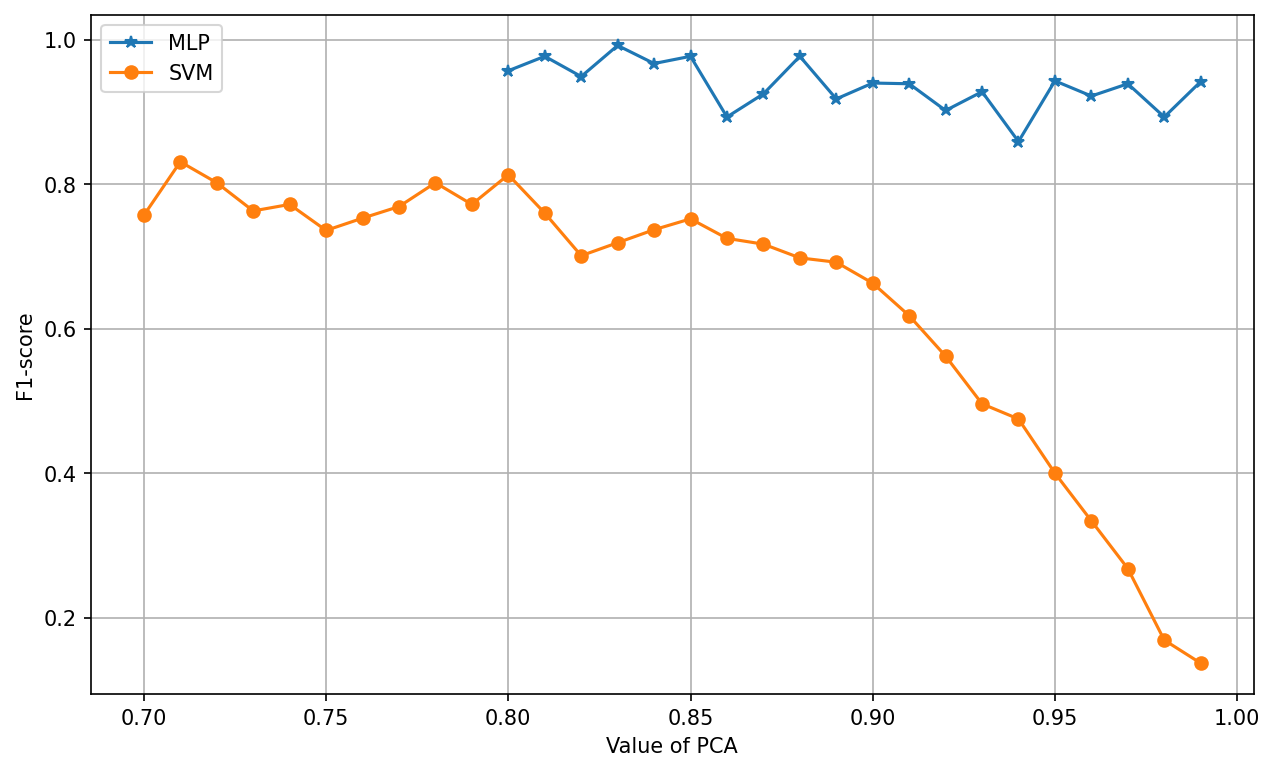

In [68]:
x1 = np.linspace(0.8, 1, num=20, endpoint=False)
y1 = mlp_all_F1score

x2 = np.linspace(0.7, 1, num=30, endpoint=False)
y2 = svm_all_F1score

plt.figure(figsize=(10,6), dpi=150)
plt.plot(x1, y1, marker='*', label='MLP')
plt.plot(x2, y2, marker='o', label='SVM')
plt.xlabel('Value of PCA')
plt.ylabel('F1-score')
plt.legend()

plt.grid()
plt.show()

### 5.2 Visualize the F1-score of all models

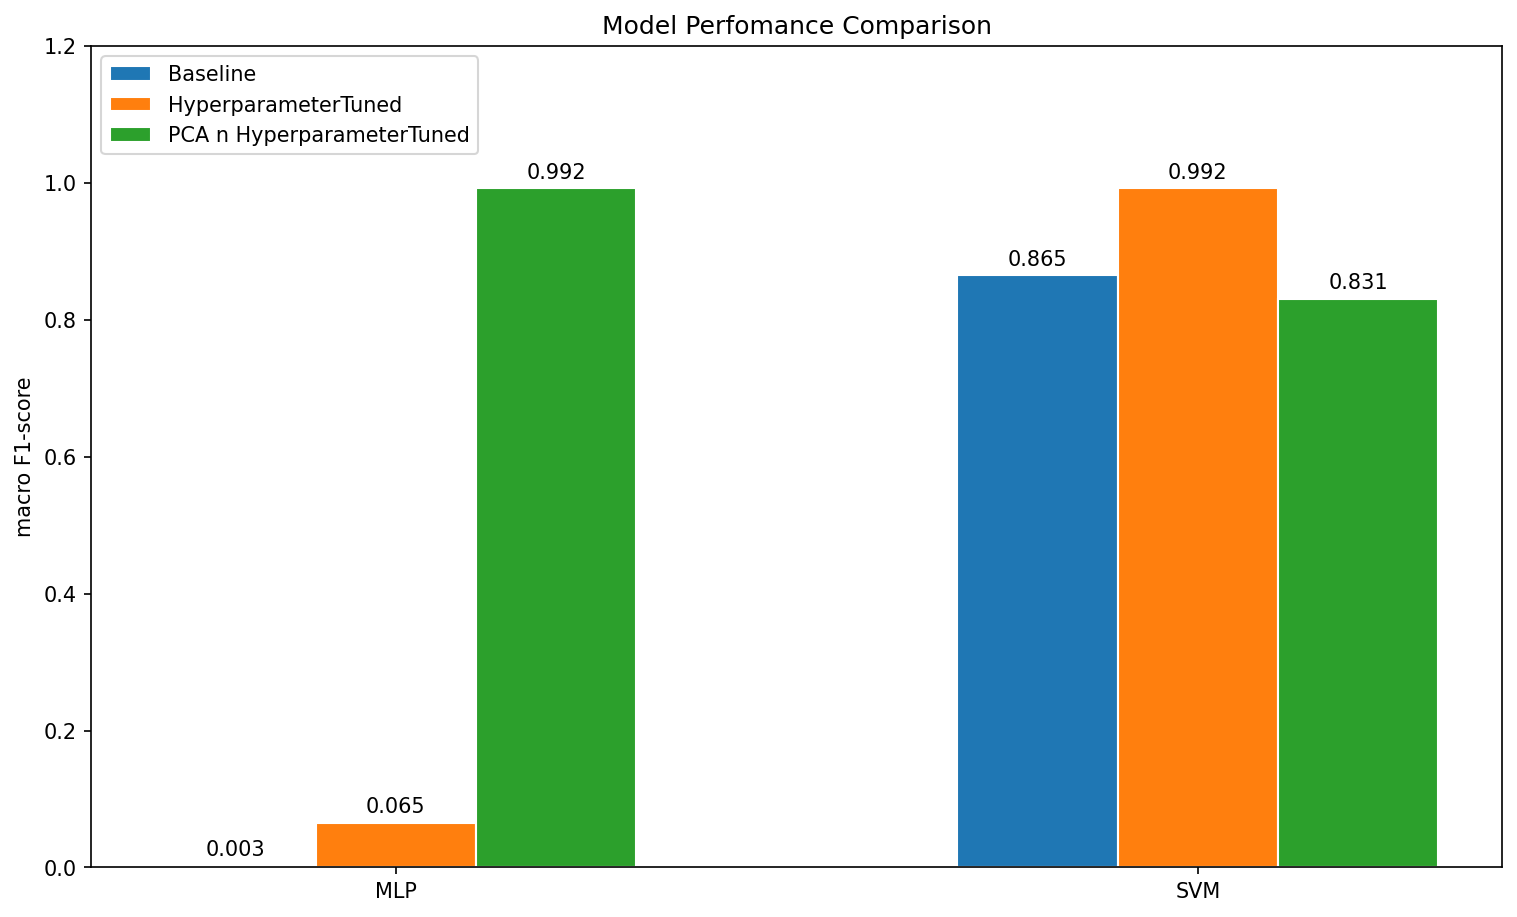

In [87]:
model_names = ('MLP', 'SVM')
metric_score = {
    'Baseline': (all_macroF1score_baseline),
    'HyperparameterTuned': (round(max_mlp_F1score_01, 3), round(svm_F1score_01, 3)),
    'PCA n HyperparameterTuned': (mlp_F1score_02, svm_F1score_02),
}

x = np.arange(len(model_names))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10,6), layout='constrained', dpi=150)

for attribute, measurement in metric_score.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, edgecolor='white')
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('macro F1-score')
ax.set_title('Model Perfomance Comparison')
ax.set_xticks(x + width, model_names)
ax.legend(loc='upper left')
ax.set_ylim(0, 1.2)

plt.show()


>**Conclusion**
>- If doing hyperparameter tuning by RandomizedSearchCV() only, it improves SVM model F1-score considerably to 0.992, but not that much on MLP model.
>- If reducing dimensions by PCA, together with fine tuned hyperparameters, it improves MLP model F1-score dramatically to 0.992, but lower SVM model performance over 10% that less than the baseline score. 
>- So if feature dimension is huge like this dataset, implement PCA can improve MLP model performance significantly. Whileas for SVM, fine-tuning the hyperparameters is more critical.
>- The value of PCA can lead to difference results. It is necessary to select a best one.